In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [69]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [70]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


Text(0.5, 0, 'FICO')

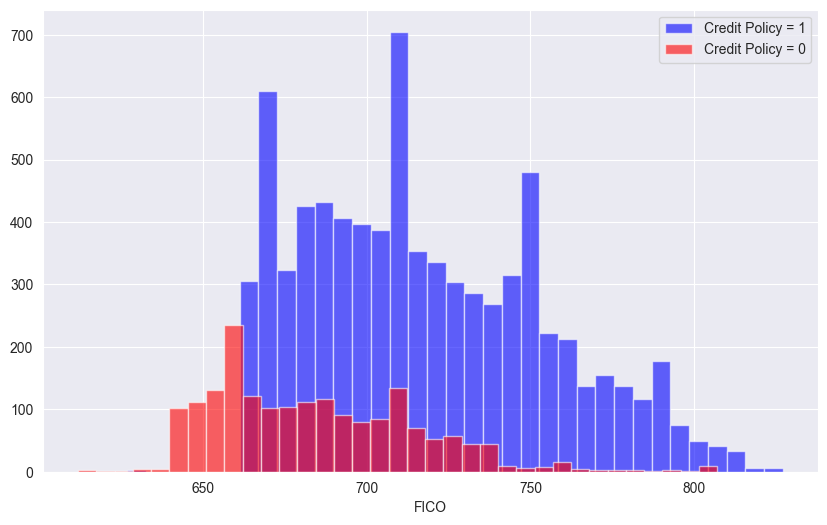

In [72]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='Credit Policy = 1', alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

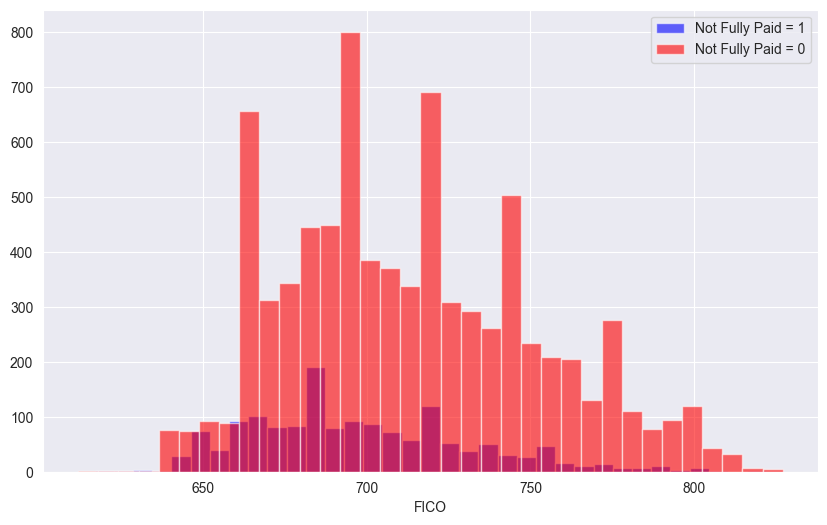

In [74]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label='Not Fully Paid = 1', alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color='red', label='Not Fully Paid = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='purpose', ylabel='count'>

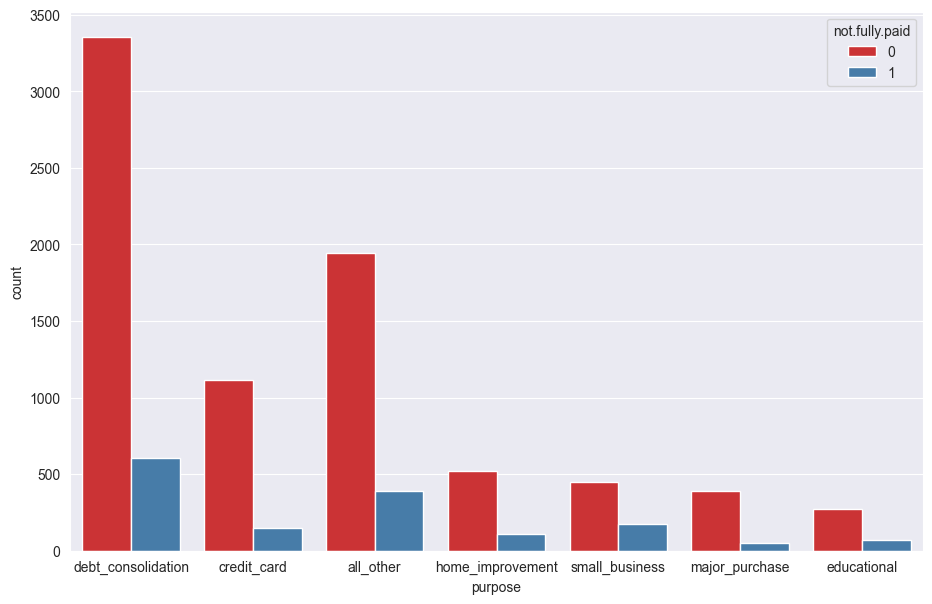

In [76]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid', palette='Set1')

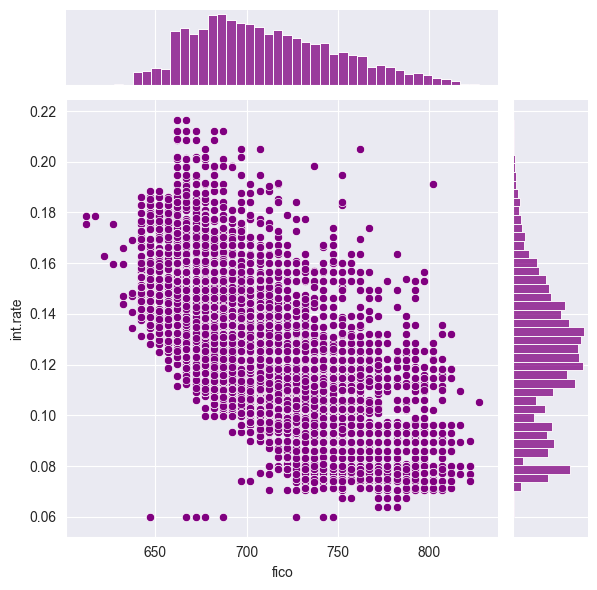

In [77]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

<Figure size 1100x700 with 0 Axes>

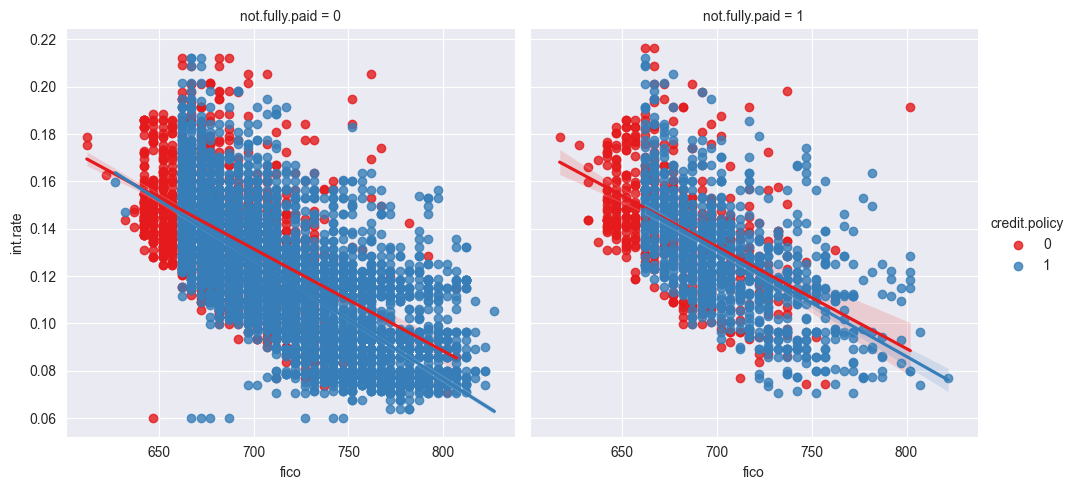

In [31]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [32]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [79]:
cat_feats = ['purpose']

In [80]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True).astype(int)

In [81]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   credit.policy               9578 non-null   int64
 1   int.rate                    9578 non-null   int64
 2   installment                 9578 non-null   int64
 3   log.annual.inc              9578 non-null   int64
 4   dti                         9578 non-null   int64
 5   fico                        9578 non-null   int64
 6   days.with.cr.line           9578 non-null   int64
 7   revol.bal                   9578 non-null   int64
 8   revol.util                  9578 non-null   int64
 9   inq.last.6mths              9578 non-null   int64
 10  delinq.2yrs                 9578 non-null   int64
 11  pub.rec                     9578 non-null   int64
 12  not.fully.paid              9578 non-null   int64
 13  purpose_credit_card         9578 non-null   int64
 14  purpose_

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [84]:
dtree = DecisionTreeClassifier()

In [85]:
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [86]:
pred_dtree = dtree.predict(X_test)

In [94]:
print(confusion_matrix(y_test,pred_dtree))
print("\n")
print(classification_report(y_test,pred_dtree))
print("\n")


[[2222  444]
 [ 392  103]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2666
           1       0.19      0.21      0.20       495

    accuracy                           0.74      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.75      0.74      0.74      3161





In [97]:
for col, importance in zip(final_data.columns, dtree.feature_importances_):
    print(f'Column: {col}  --->  Importance: {importance:.4f}')


Column: credit.policy  --->  Importance: 0.0260
Column: int.rate  --->  Importance: 0.0000
Column: installment  --->  Importance: 0.1774
Column: log.annual.inc  --->  Importance: 0.0287
Column: dti  --->  Importance: 0.0856
Column: fico  --->  Importance: 0.0819
Column: days.with.cr.line  --->  Importance: 0.1573
Column: revol.bal  --->  Importance: 0.1499
Column: revol.util  --->  Importance: 0.1311
Column: inq.last.6mths  --->  Importance: 0.0547
Column: delinq.2yrs  --->  Importance: 0.0170
Column: pub.rec  --->  Importance: 0.0138
Column: not.fully.paid  --->  Importance: 0.0084
Column: purpose_credit_card  --->  Importance: 0.0211
Column: purpose_debt_consolidation  --->  Importance: 0.0098
Column: purpose_educational  --->  Importance: 0.0146
Column: purpose_home_improvement  --->  Importance: 0.0108
Column: purpose_major_purchase  --->  Importance: 0.0120


In [99]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [100]:
pred_rfc = rfc.predict(X_test)

In [101]:
print(confusion_matrix(y_test,pred_rfc))
print("\n")
print(classification_report(y_test,pred_rfc))

[[2651   15]
 [ 481   14]]


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2666
           1       0.48      0.03      0.05       495

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.48      3161
weighted avg       0.79      0.84      0.78      3161



In [102]:
for col, importance in zip(final_data.columns, rfc.feature_importances_):
    print(f'Column: {col}  --->  Importance: {importance:.4f}')

Column: credit.policy  --->  Importance: 0.0178
Column: int.rate  --->  Importance: 0.0000
Column: installment  --->  Importance: 0.1500
Column: log.annual.inc  --->  Importance: 0.0362
Column: dti  --->  Importance: 0.1045
Column: fico  --->  Importance: 0.1030
Column: days.with.cr.line  --->  Importance: 0.1491
Column: revol.bal  --->  Importance: 0.1502
Column: revol.util  --->  Importance: 0.1298
Column: inq.last.6mths  --->  Importance: 0.0658
Column: delinq.2yrs  --->  Importance: 0.0189
Column: pub.rec  --->  Importance: 0.0110
Column: not.fully.paid  --->  Importance: 0.0105
Column: purpose_credit_card  --->  Importance: 0.0190
Column: purpose_debt_consolidation  --->  Importance: 0.0069
Column: purpose_educational  --->  Importance: 0.0092
Column: purpose_home_improvement  --->  Importance: 0.0060
Column: purpose_major_purchase  --->  Importance: 0.0120
